# Semi-synthetic data generation parameters

In [1]:
import numpy as np
import pandas as pd

## Cell exclusion parameters

In [2]:
cell_data = pd.read_csv("../datasets/kuett_catena_2022/sectioning/cell_data.csv")

In [3]:
d_obs = 2 * cell_data.loc[cell_data["sectioning_axis_name"] == "z", "proj_cell_radius_um"].to_numpy()
print("Cell diameter mean:", d_obs.mean())
print("Cell diameter SD:", d_obs.std())

Cell diameter mean: 7.9312735863614465
Cell diameter SD: 1.7681411523960602


## Cell displacement parameters

In [4]:
cell_slice_displacement_data = pd.read_csv("../datasets/kuett_catena_2022/sectioning/cell_slice_displacement_data.csv")

-0.003080381647668883 1.069840723416532


<AxesSubplot:>

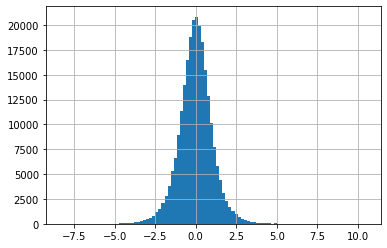

In [5]:
df_x = cell_slice_displacement_data.loc[
    (cell_slice_displacement_data["sectioning_axis_name"] == "z") & (cell_slice_displacement_data["section_thickness_um"] == 2),
    "cell_slice_centroid_displacement_x_um",
]
print(df_x.mean(), df_x.var())
df_x.hist(bins=100)

-0.1325194035261297 0.9496678407197192


<AxesSubplot:>

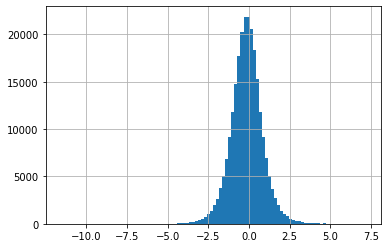

In [6]:
df_y = cell_slice_displacement_data.loc[
    (cell_slice_displacement_data["sectioning_axis_name"] == "z") & (cell_slice_displacement_data["section_thickness_um"] == 2),
    "cell_slice_centroid_displacement_y_um",
]
print(df_y.mean(), df_y.var())
df_y.hist(bins=100)

$R \sim \mathrm{Rayleigh}(\sigma)$ is Rayleigh distributed if $R = \sqrt{X^2 + Y^2}$, where $X \sim N(0, \sigma^2)$ and $Y \sim N(0, \sigma^2)$ are independent normal random variables.

Given a sample of $N$ independent and identically distributed Rayleigh random variables $x_i$ with parameter $\sigma$, $\widehat{\sigma}^2\approx \!\,\frac{1}{2N}\sum_{i=1}^N x_i^2$ is the maximum likelihood estimate and also is unbiased.

See https://en.wikipedia.org/wiki/Rayleigh_distribution

In [8]:
x_centered = df_x - df_x.mean()
y_centered = df_y - df_y.mean()
r = (x_centered ** 2 + y_centered ** 2) ** 0.5
print("Cell displacement variance:", 0.5 * np.mean(r ** 2))

Cell displacement variance: 1.0097501420171944
